In [ ]:
import yfinance as yf
import pandas as pd

# Example list of S&P 500 tickers (you'll need to get the full list)
sp500_tickers = ["AAPL", "NVDA", "MSFT", "GOOG", "GOOGL", "AMZN", "META", "AVGO", "LLY", "TSLA", "WMT", "JPM", "V", "XOM", "UNH", "ORCL", "MA", "HD", "PG", "COST", "JNJ", "NFLX", "ABBV", "BAC", "KO", "CRM", "CVX", "MRK", "TMUS", "AMD", "PEP", "ACN", "LIN", "TMO", "MCD", "CSCO", "ADBE", "WFC", "IBM", "GE", "ABT", "DHR", "AXP", "MS", "CAT", "NOW", "QCOM", "PM", "ISRG", "VZ"]

# Dictionary to store stock data
stock_data = {}

for ticker in sp500_tickers:
    # Download data for each ticker
    data = yf.download(ticker, start='2003-01-01', end='2024-11-26')
    stock_data[ticker] = data

# Convert to a DataFrame for easier handling if needed
all_data = pd.concat(stock_data, axis=0)
print(all_data.head())

In [ ]:
all_data.to_parquet('sp500_50stocks_data.parquet')

In [ ]:
# Check the number of records for each ticker
record_counts = {ticker: len(data) for ticker, data in stock_data.items()}

# Print record counts
for ticker, count in record_counts.items():
    print(f"{ticker}: {count} records")

# Check if all tickers have the same number of records
all_same = len(set(record_counts.values())) == 1

if all_same:
    print("All tickers have the same number of records.")
else:
    print("Not all tickers have the same number of records.")

AAPL: 5513 records
NVDA: 5513 records
MSFT: 5513 records
GOOG: 5103 records
GOOGL: 5103 records
AMZN: 5513 records
META: 3151 records
AVGO: 3853 records
LLY: 5513 records
TSLA: 3628 records
WMT: 5513 records
JPM: 5513 records
V: 4202 records
XOM: 5513 records
UNH: 5513 records
ORCL: 5513 records
MA: 4658 records
HD: 5513 records
PG: 5513 records
COST: 5513 records
JNJ: 5513 records
NFLX: 5513 records
ABBV: 2996 records
BAC: 5513 records
KO: 5513 records
CRM: 5143 records
CVX: 5513 records
MRK: 5513 records
TMUS: 4433 records
AMD: 5513 records
PEP: 5513 records
ACN: 5513 records
LIN: 5513 records
TMO: 5513 records
MCD: 5513 records
CSCO: 5513 records
ADBE: 5513 records
WFC: 5513 records
IBM: 5513 records
GE: 5513 records
ABT: 5513 records
DHR: 5513 records
AXP: 5513 records
MS: 5513 records
CAT: 5513 records
NOW: 3122 records
QCOM: 5513 records
PM: 4204 records
ISRG: 5513 records
VZ: 5513 records
Not all tickers have the same number of records.


In [ ]:
# Assuming stock_data is a dictionary where each key is a ticker and the value is a DataFrame
summary_stats = {}

for ticker, data in stock_data.items():
    summary_stats[ticker] = data.describe()

# Print summary statistics for each stock
for ticker, stats in summary_stats.items():
    print(f"Summary statistics for {ticker}:")
    print(stats)
    print("\n")

Summary statistics for AAPL:
Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   5513.000000  5513.000000  5513.000000  5513.000000  5513.000000   
mean      45.968758    47.593910    48.065053    47.077583    47.560308   
std       60.852976    61.009319    61.593466    60.357396    60.951826   
min        0.197631     0.234286     0.235536     0.227143     0.231964   
25%        4.081865     4.838929     4.928214     4.739643     4.857500   
50%       18.205555    21.251072    21.464287    21.053928    21.258928   
75%       50.503071    52.560001    53.182499    52.082500    52.540001   
max      236.220108   236.479996   237.490005   234.449997   236.479996   

Price         Volume  
Ticker          AAPL  
count   5.513000e+03  
mean    3.870842e+08  
std     3.883499e+08  
min     2.404830e+07  
25%     1.068168e+08  
50%     2.494820e+08  
75%     5.407444e+08  
max     3.372

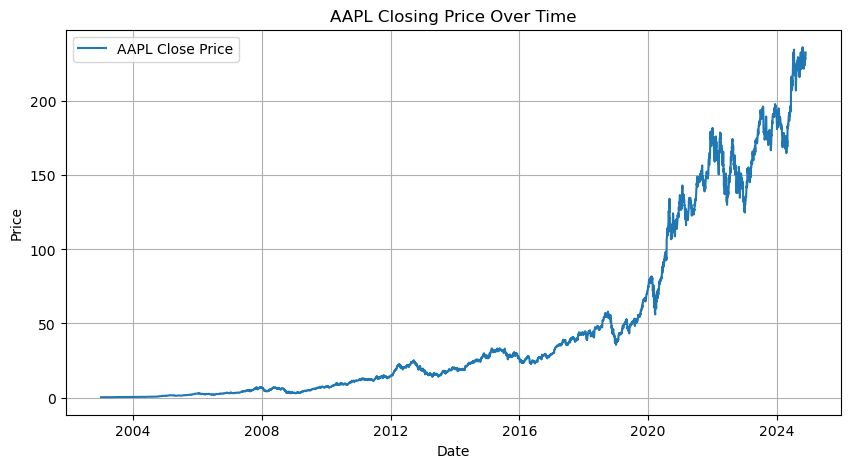

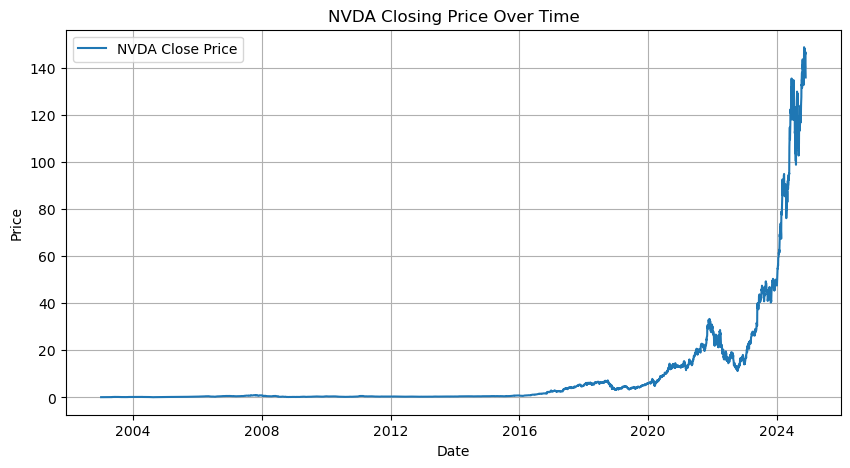

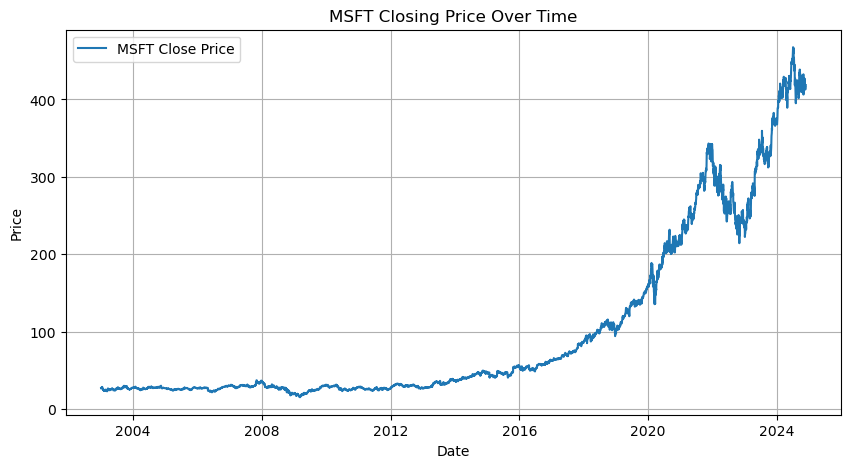

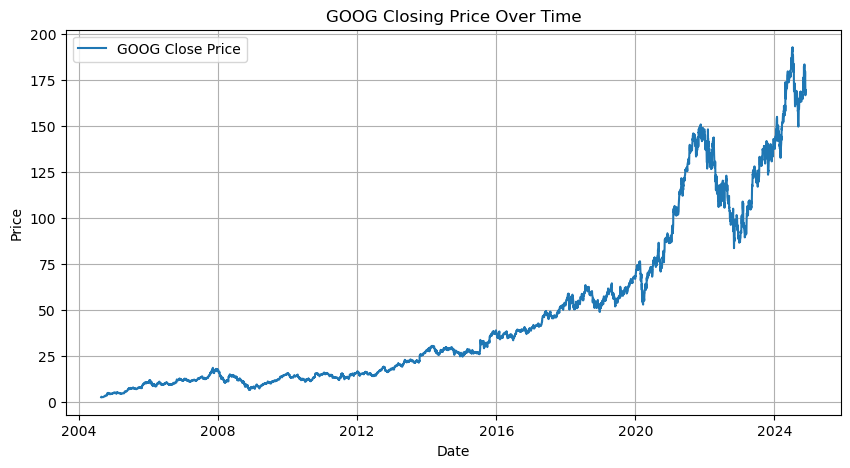

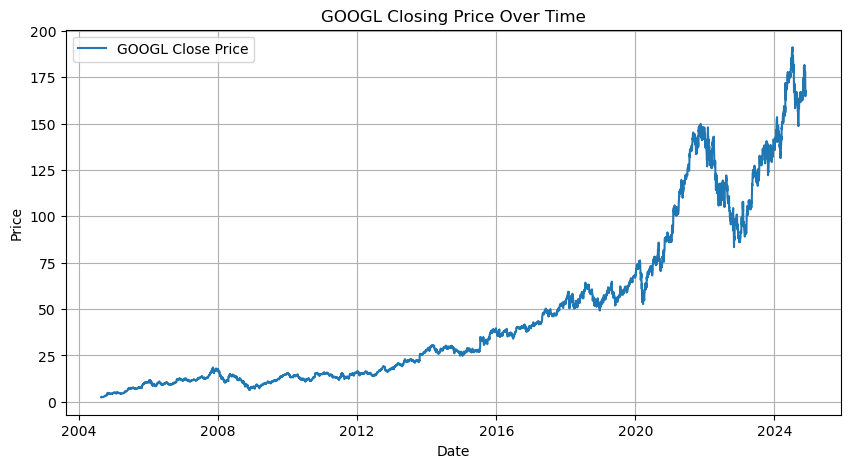

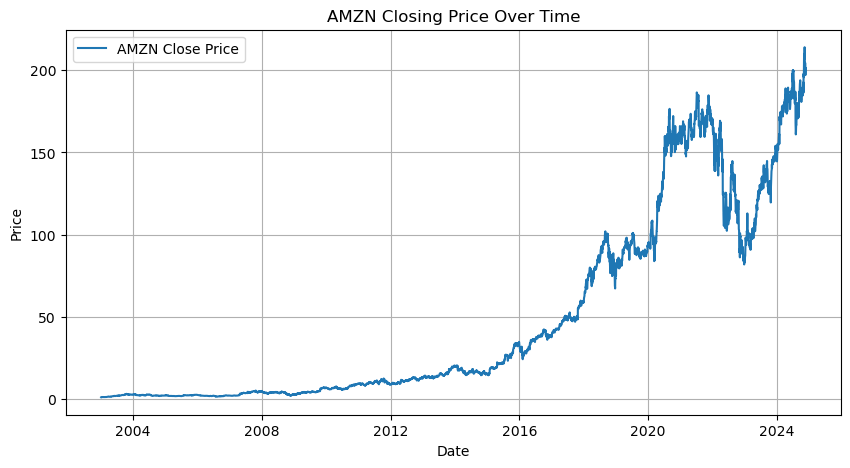

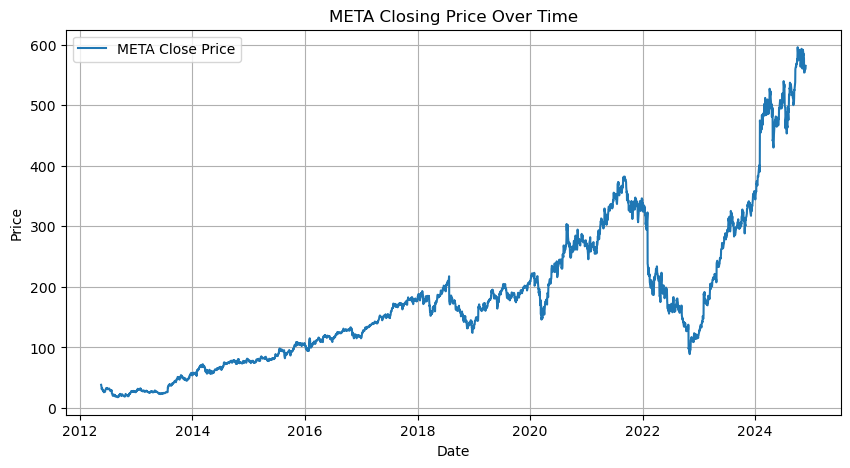

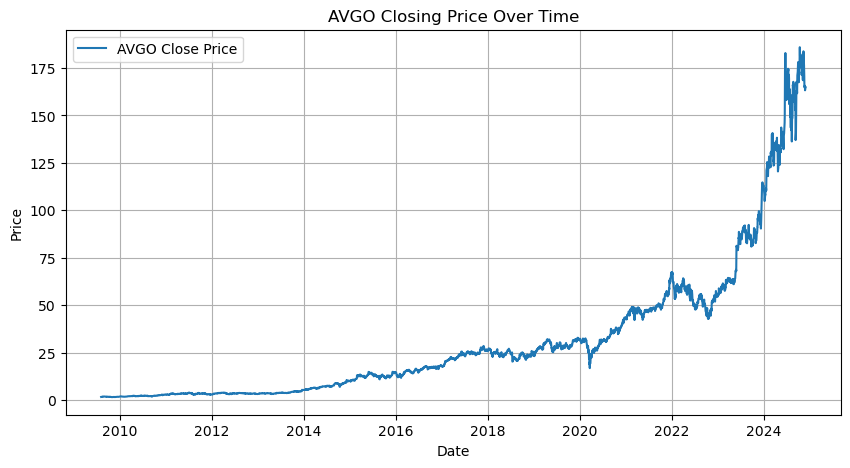

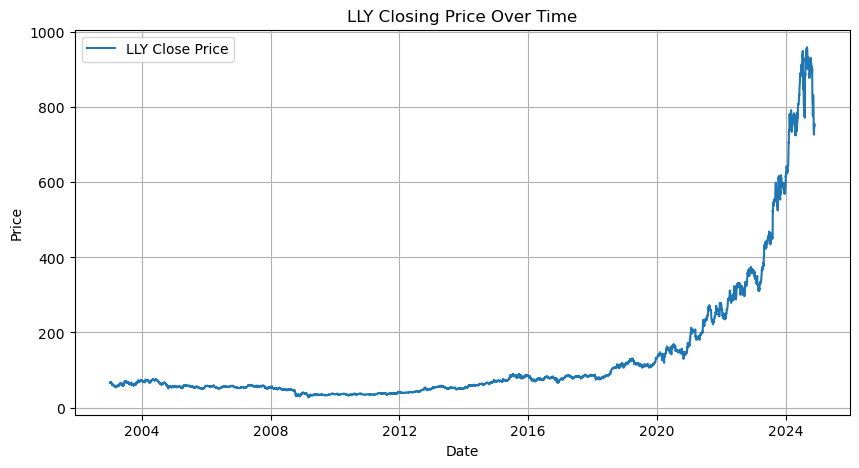

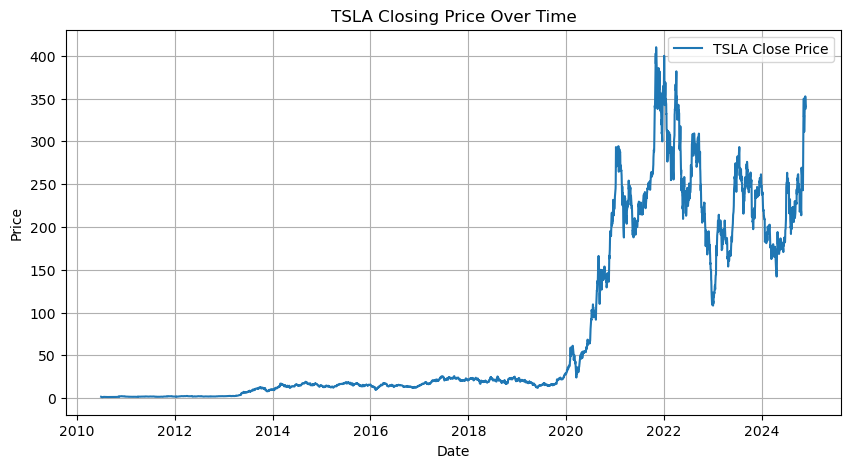

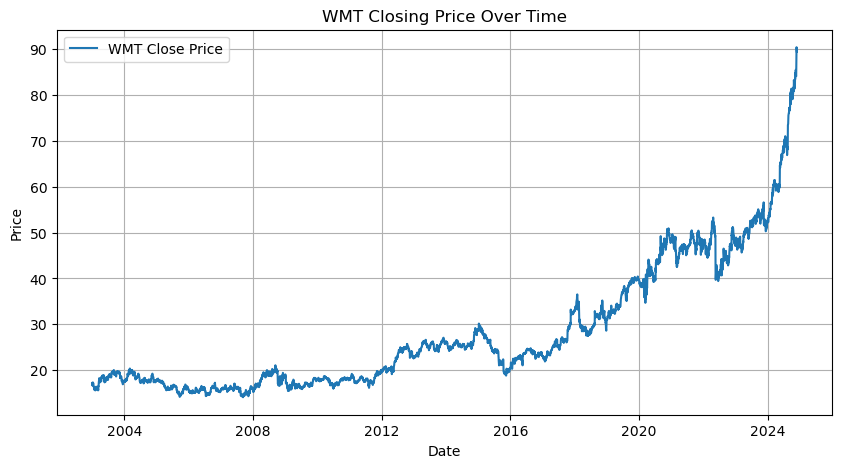

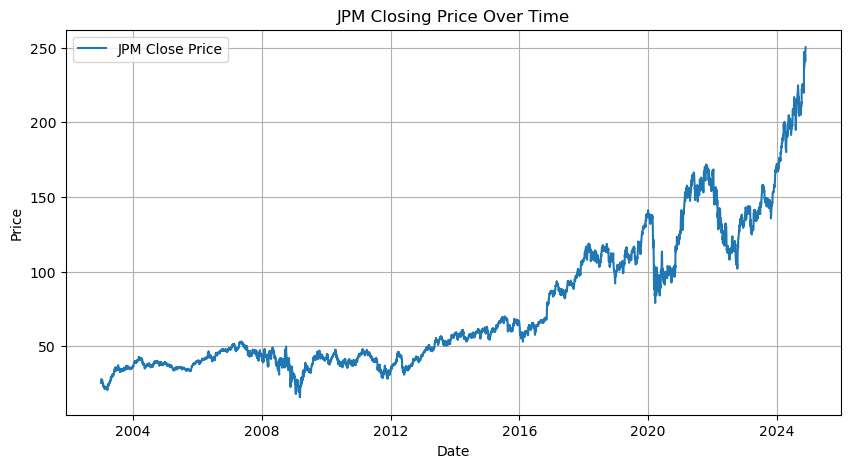

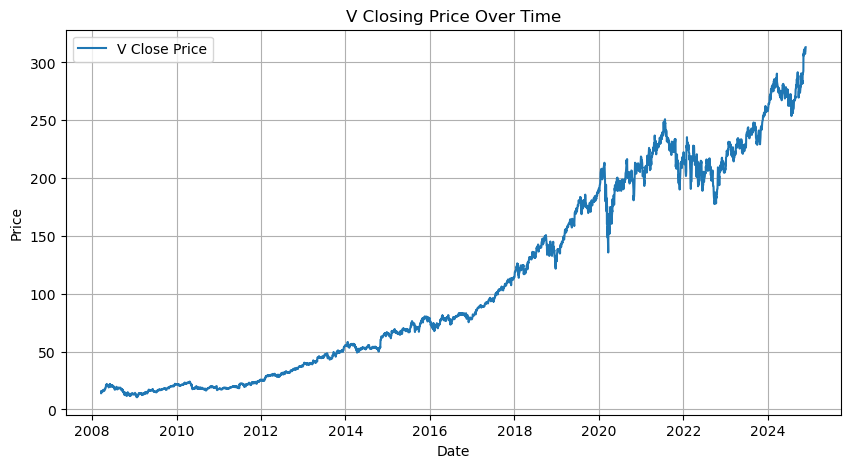

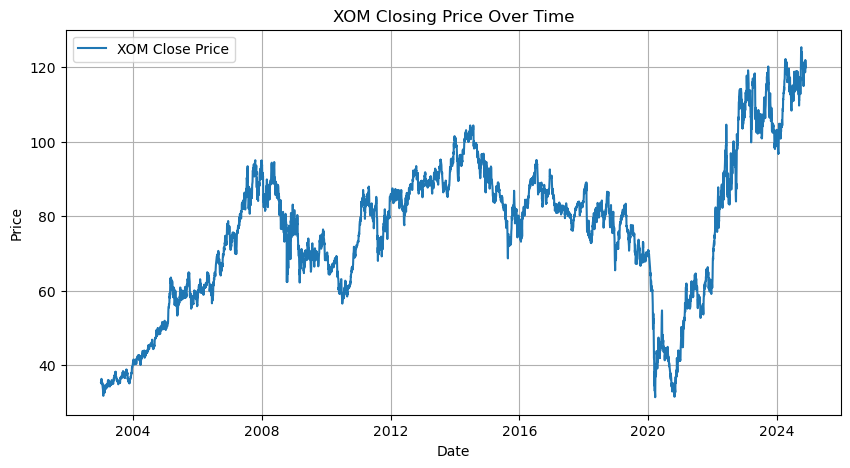

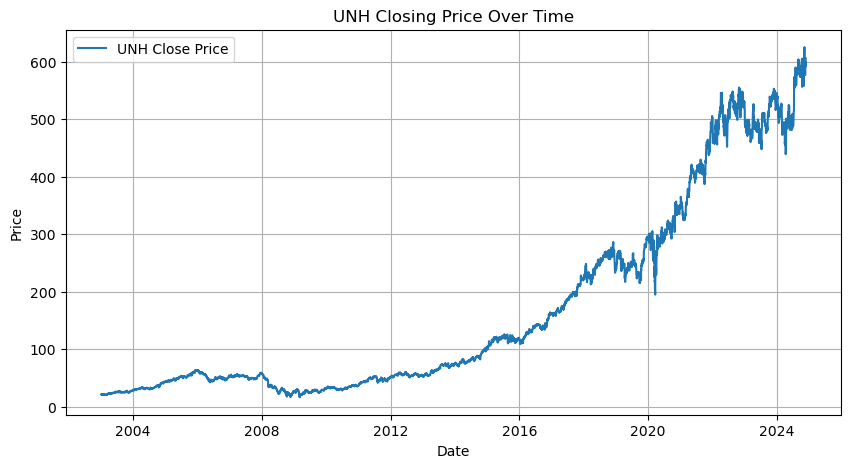

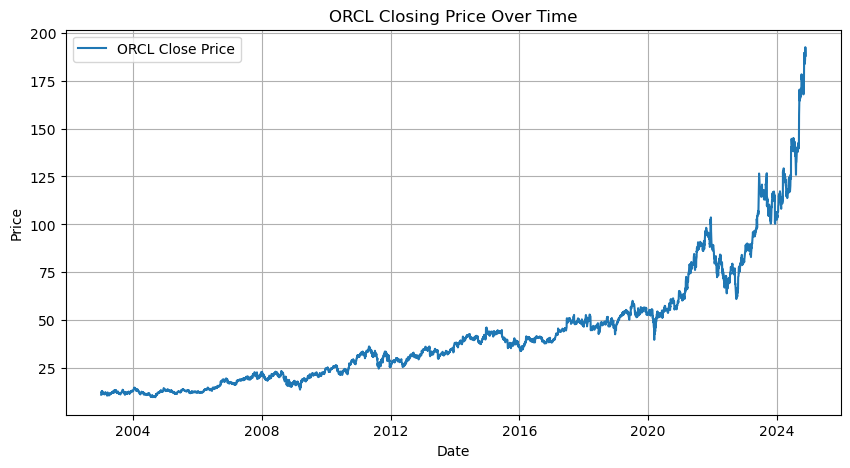

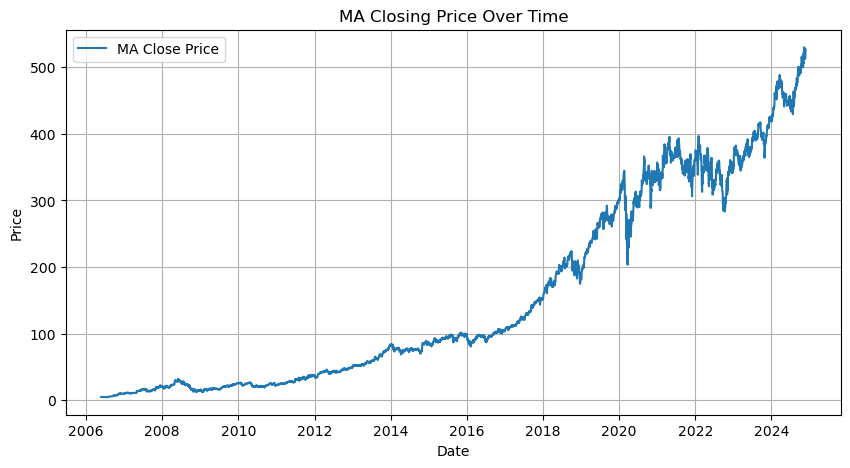

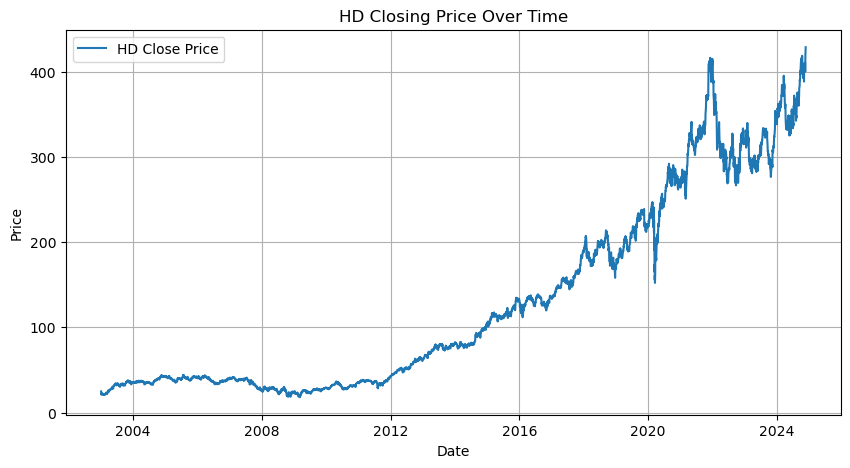

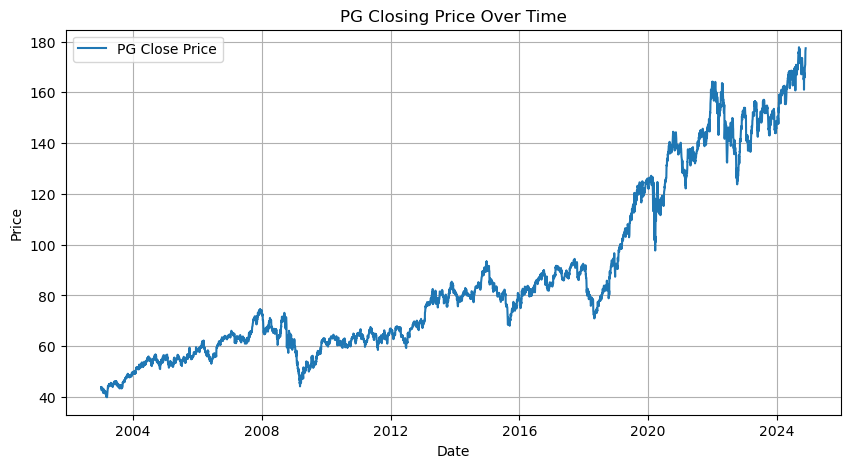

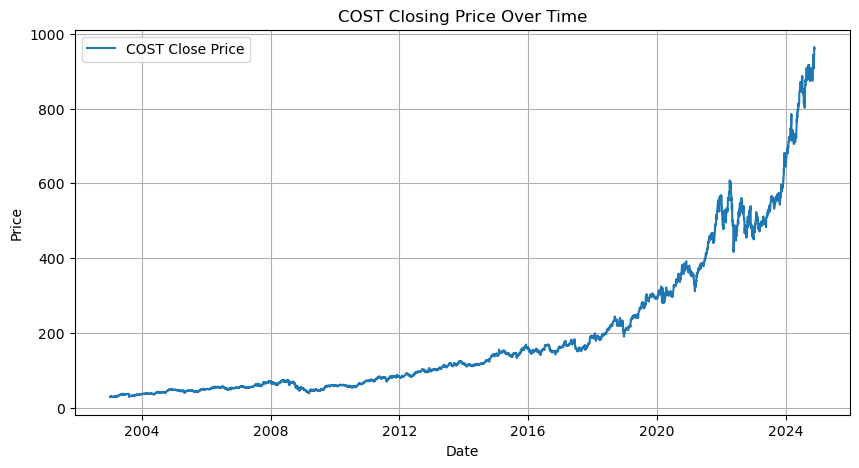

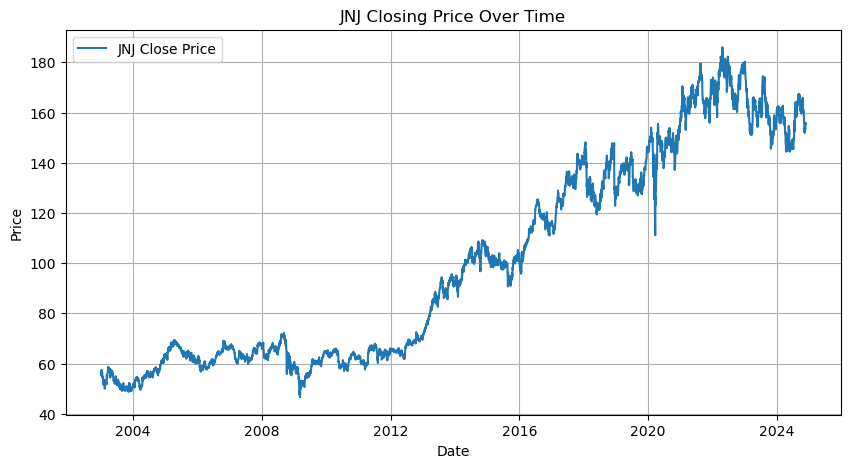

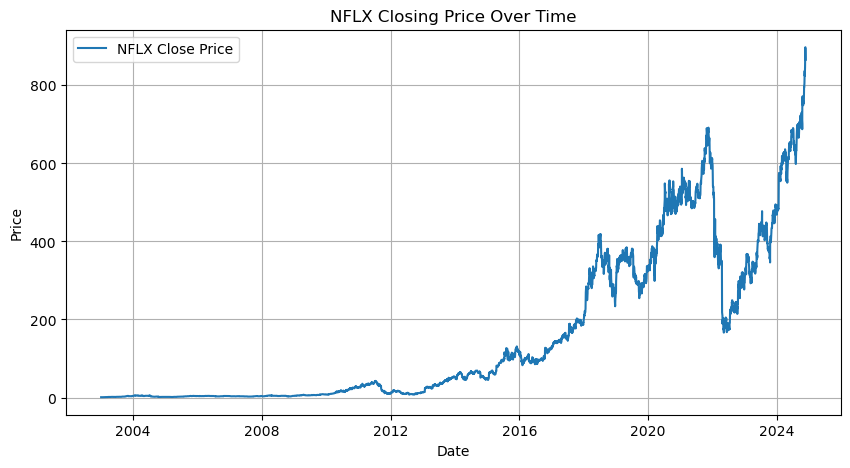

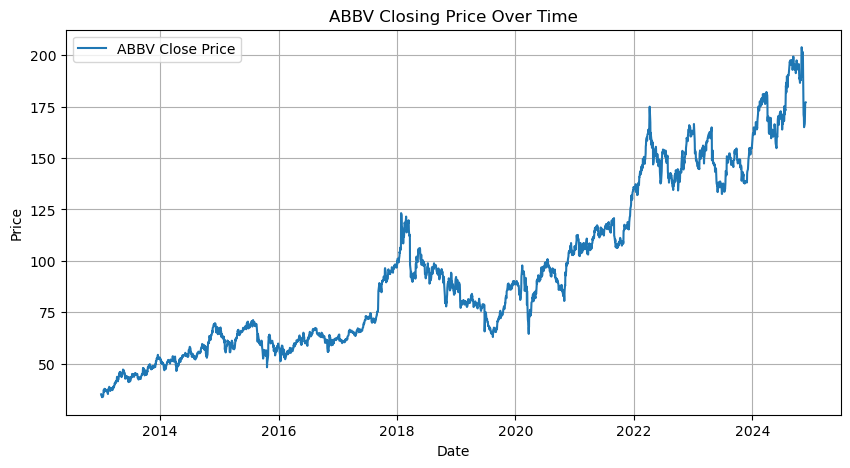

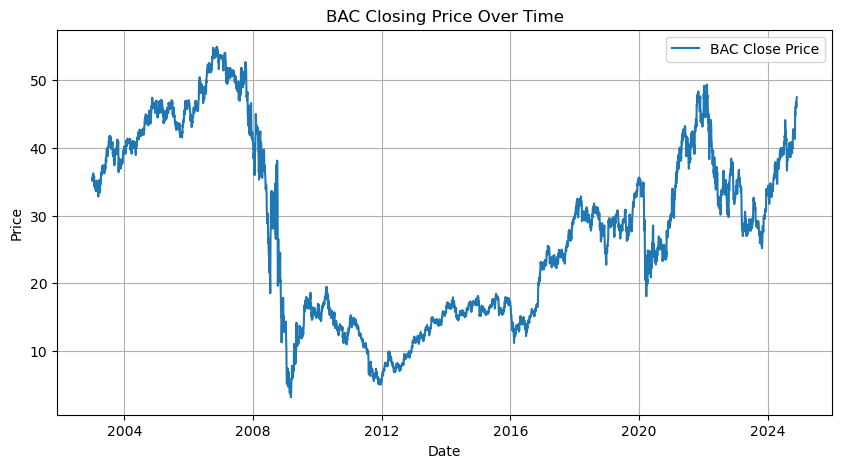

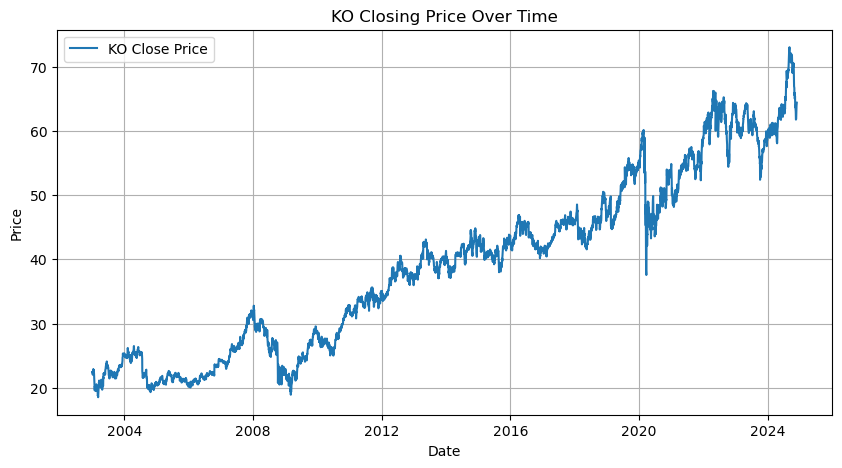

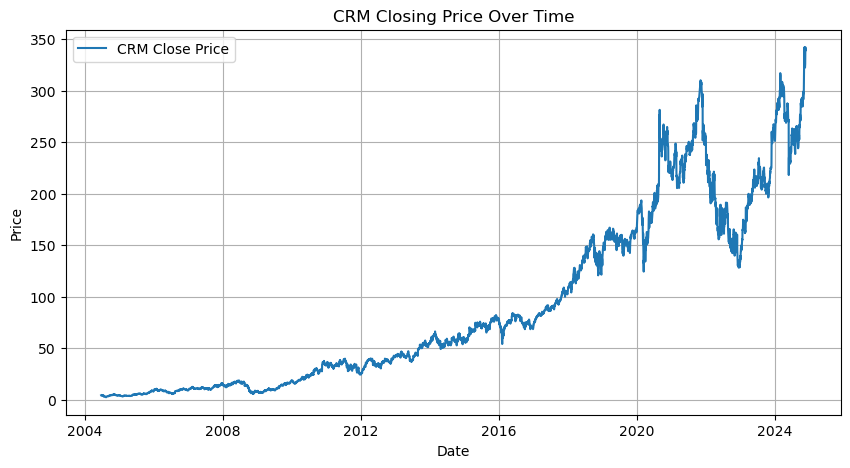

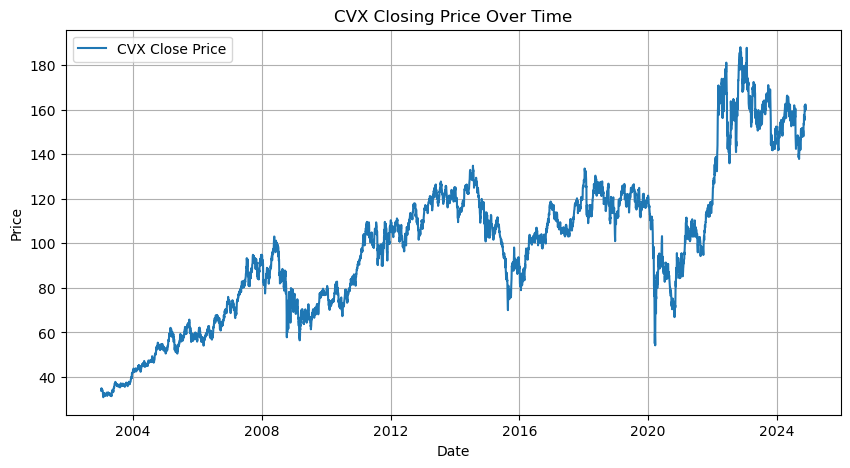

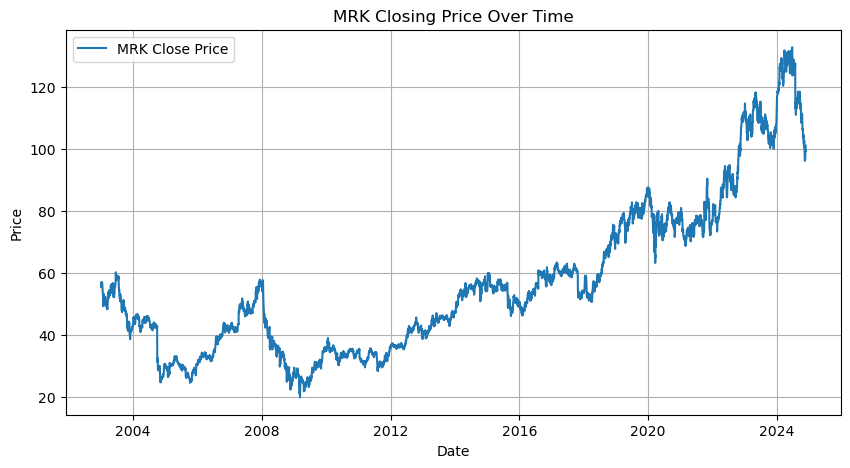

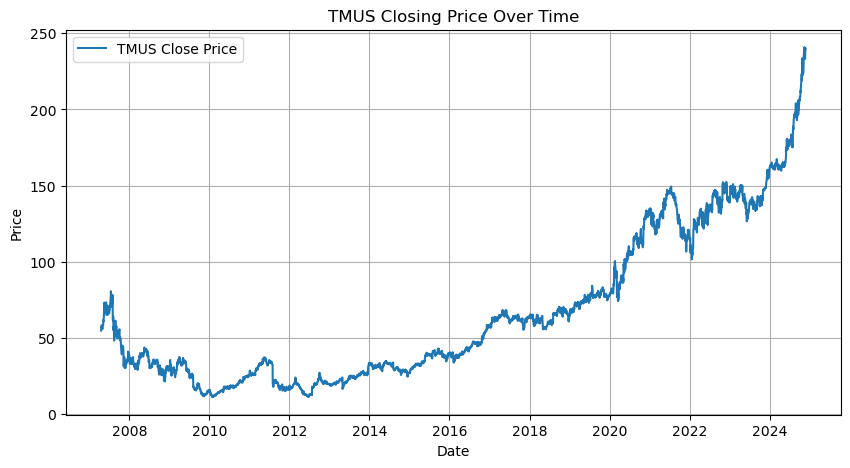

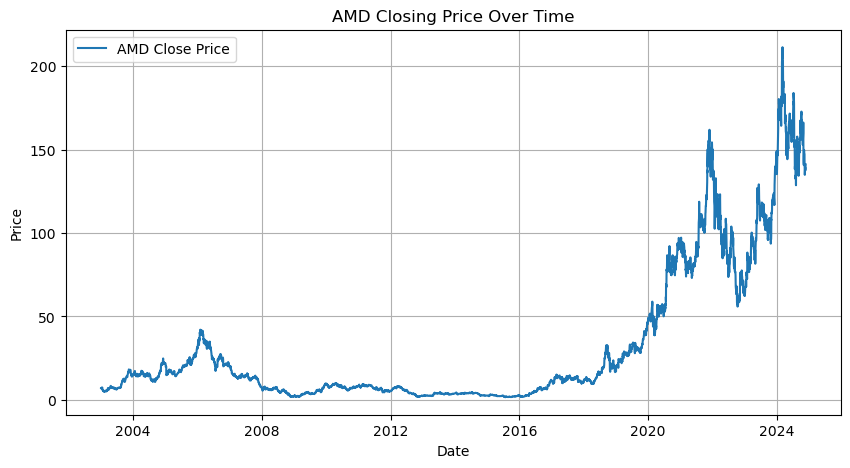

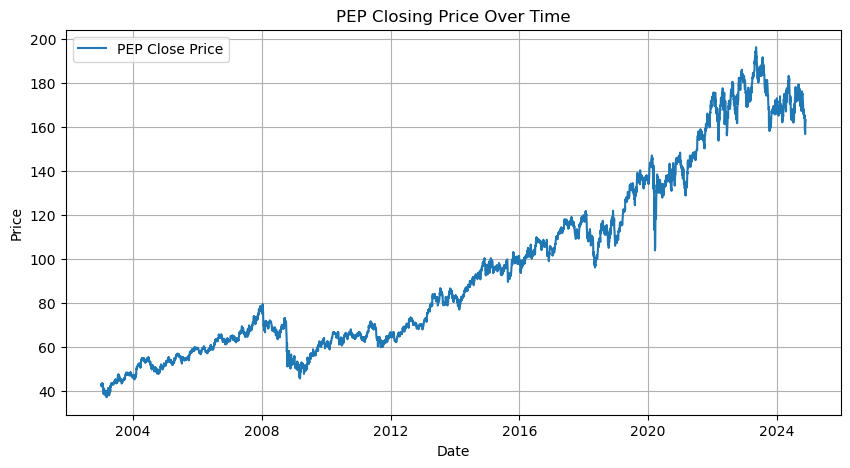

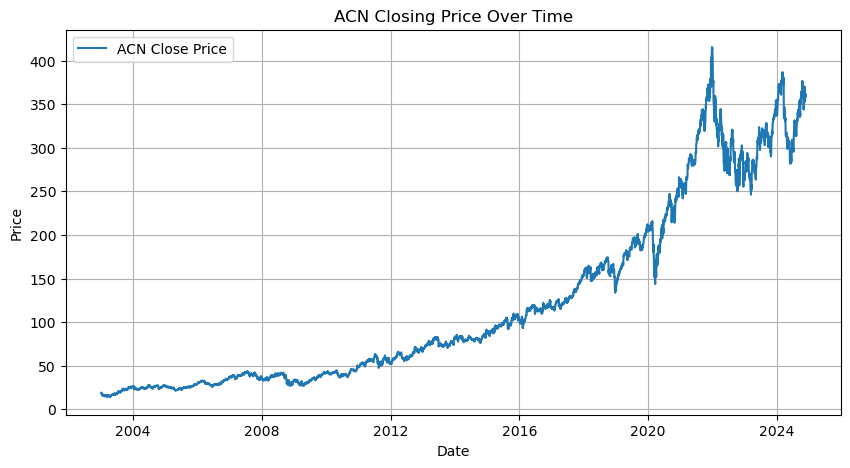

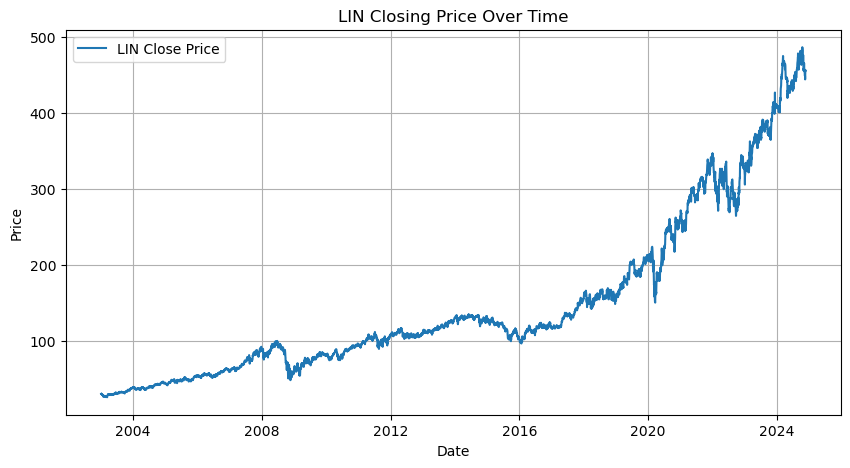

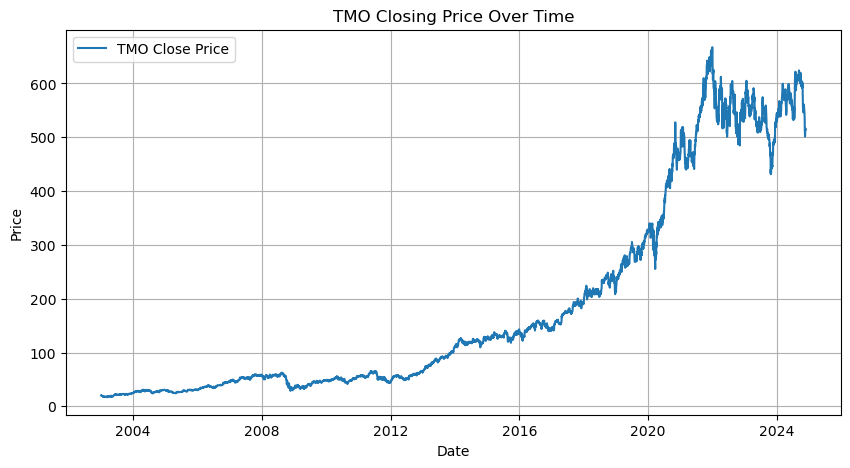

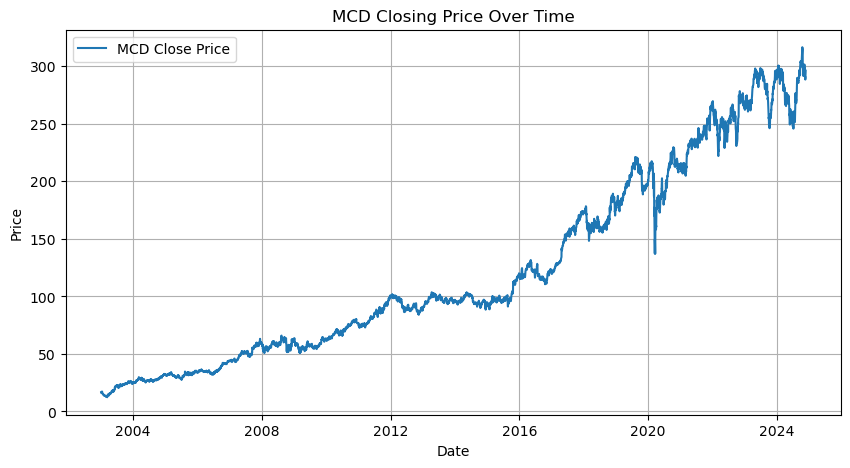

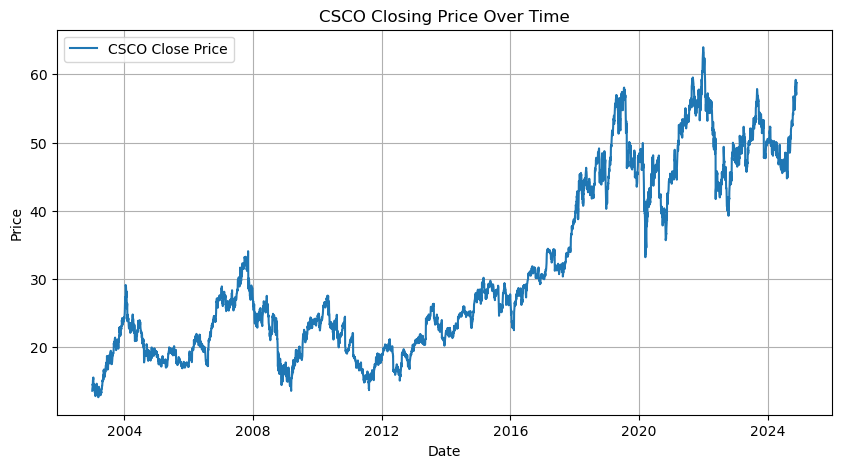

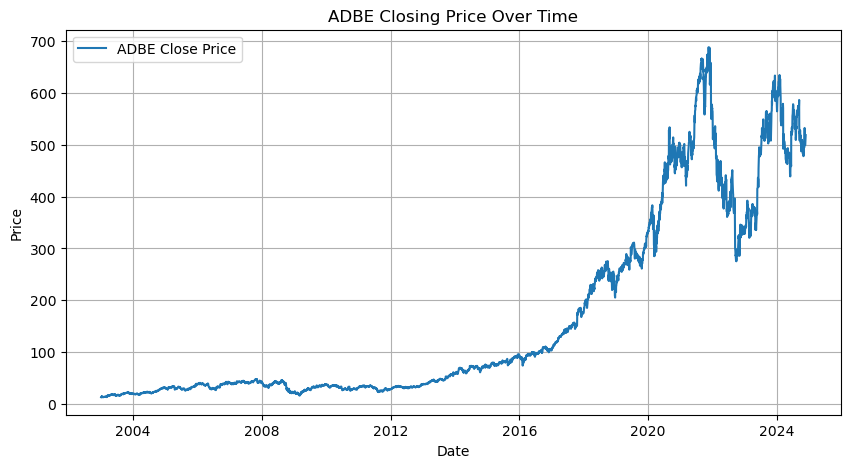

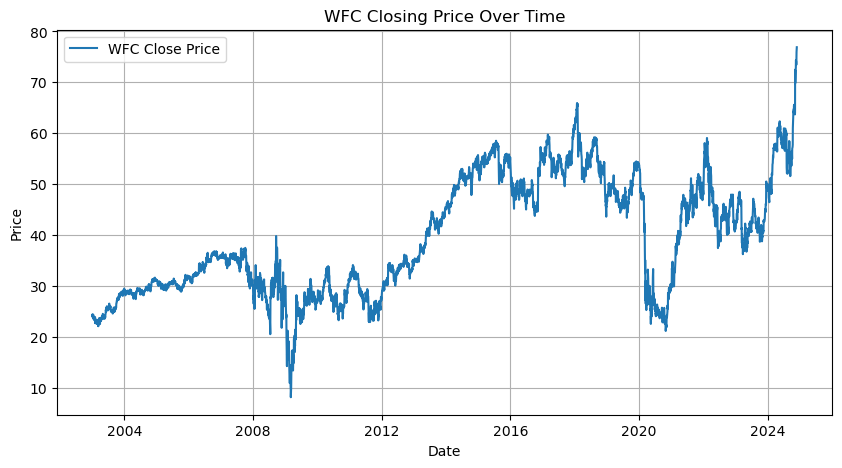

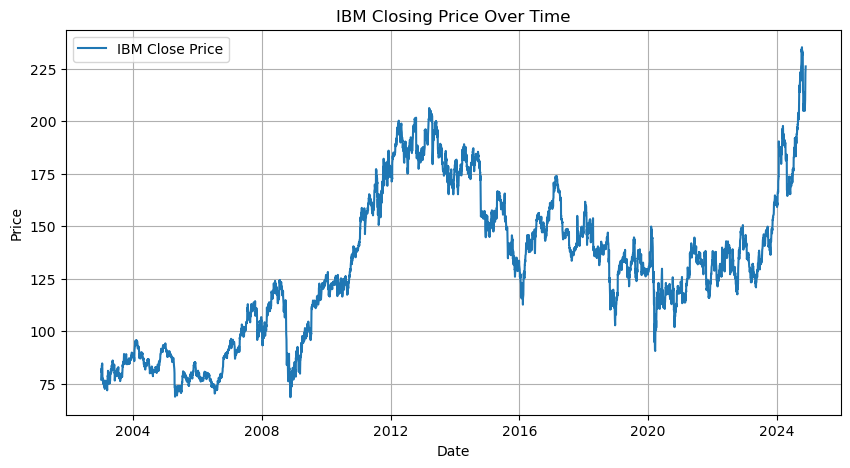

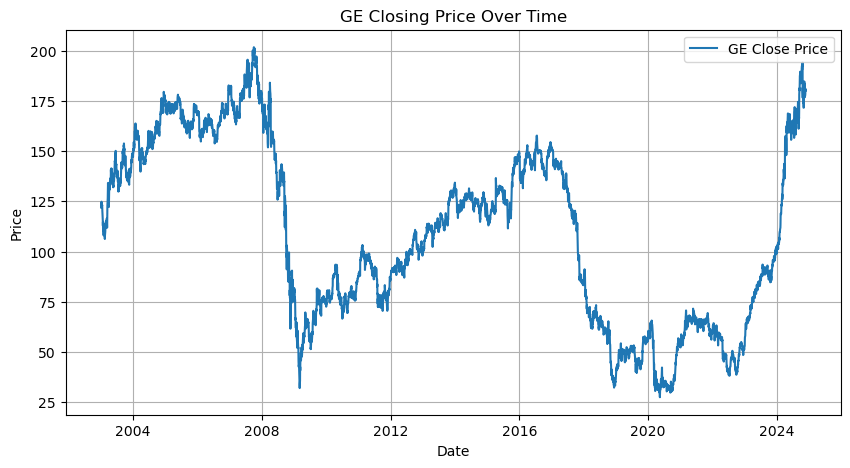

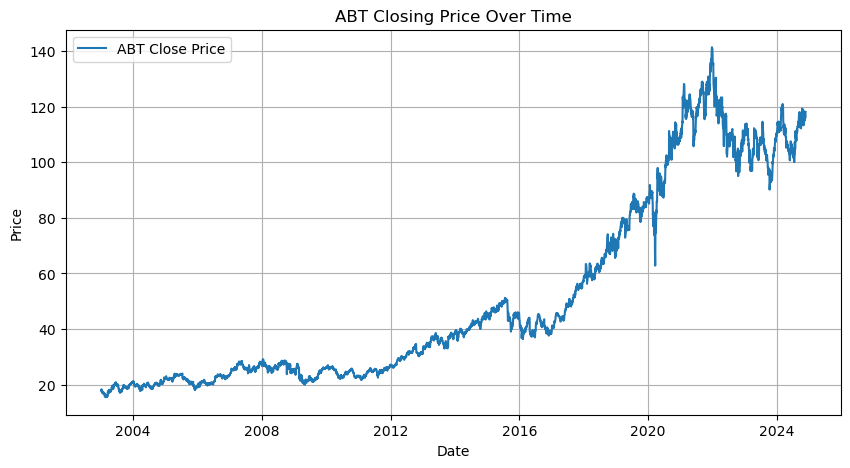

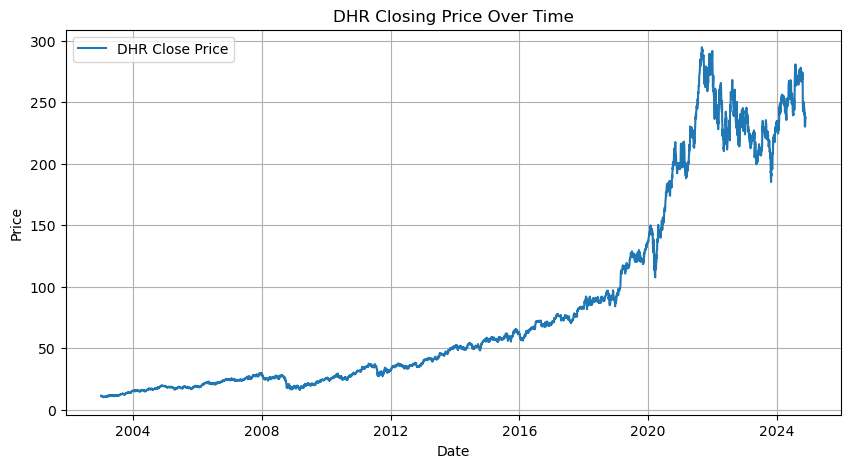

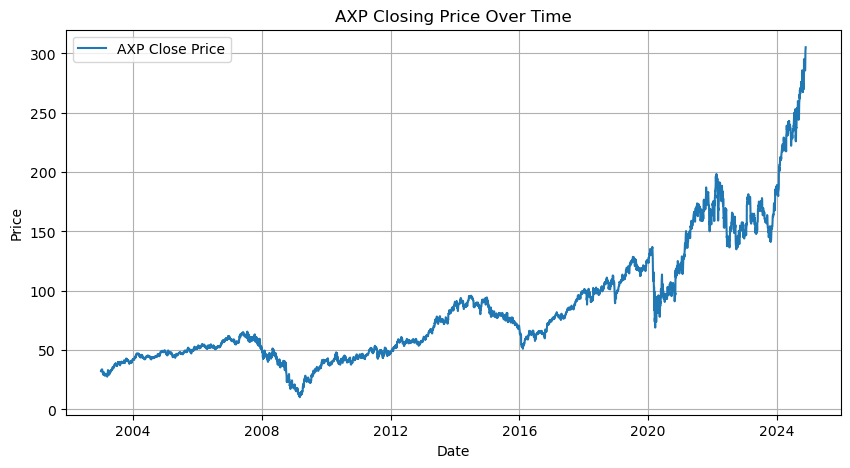

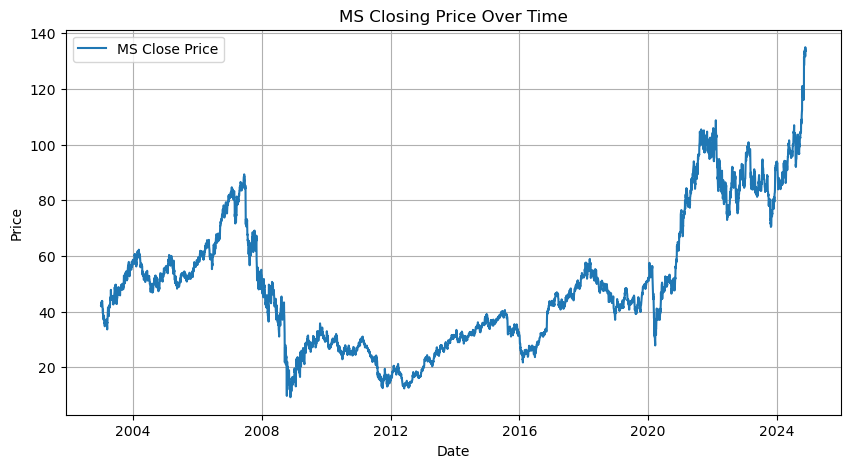

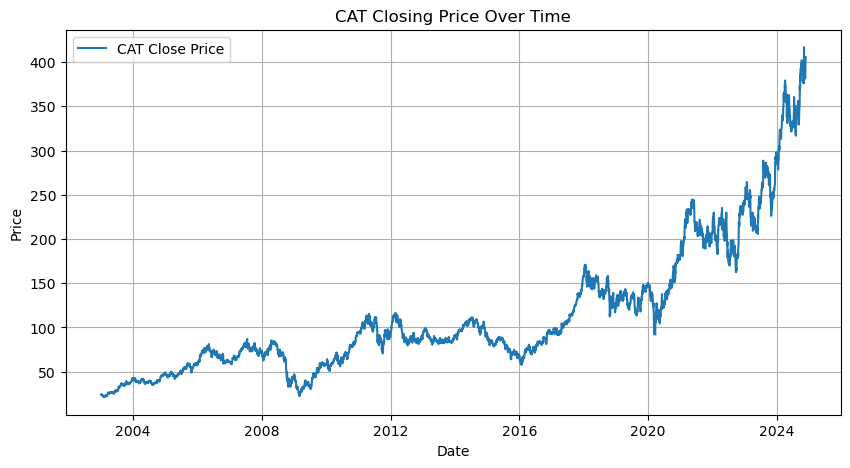

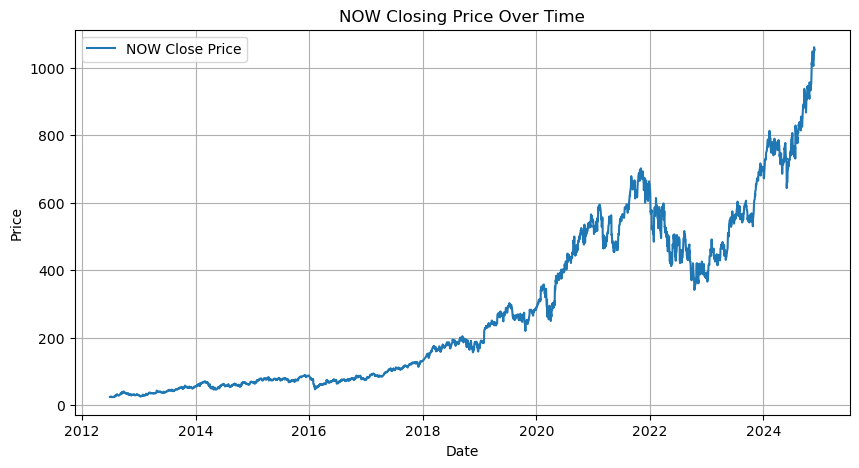

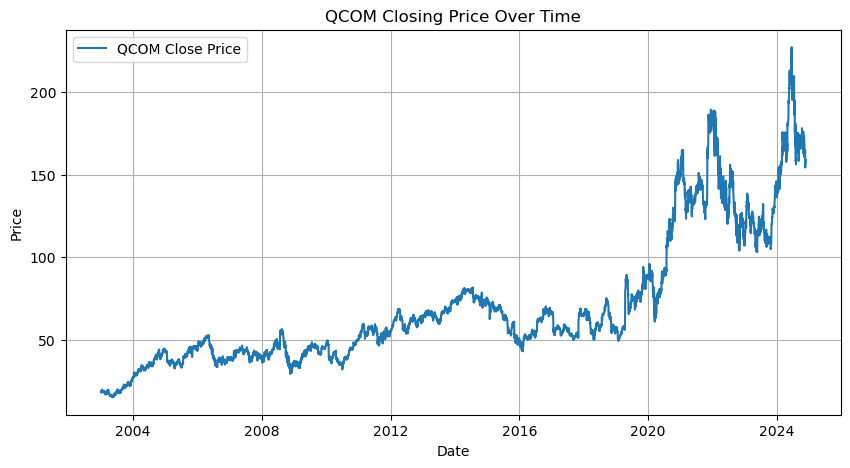

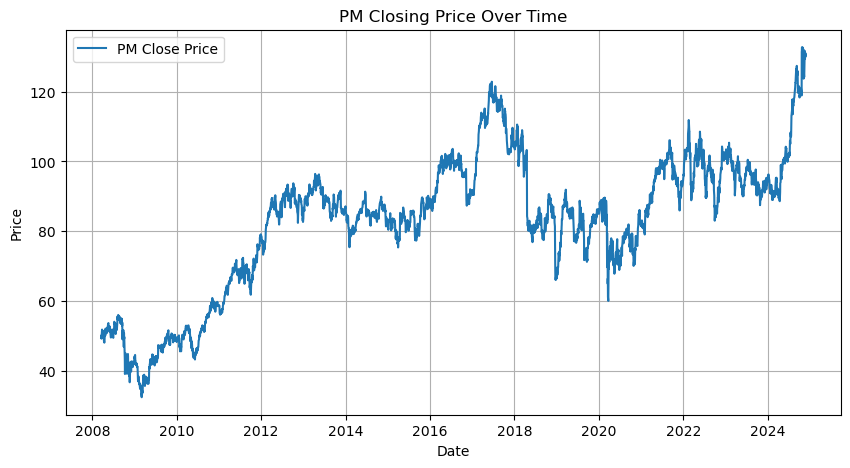

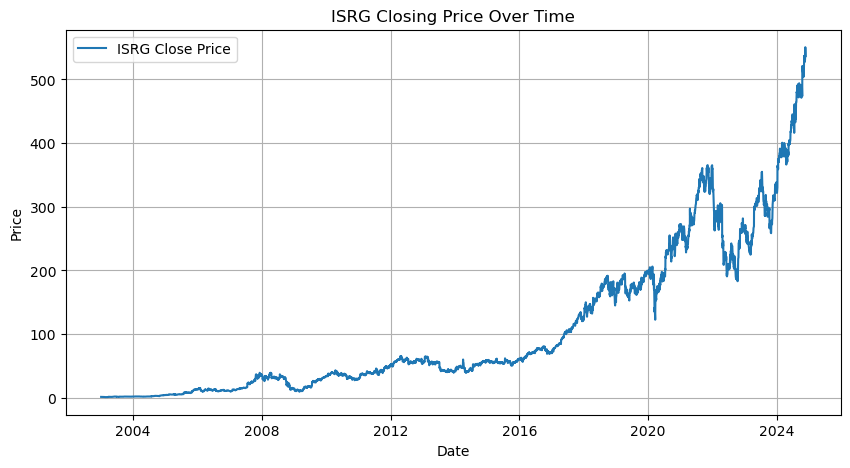

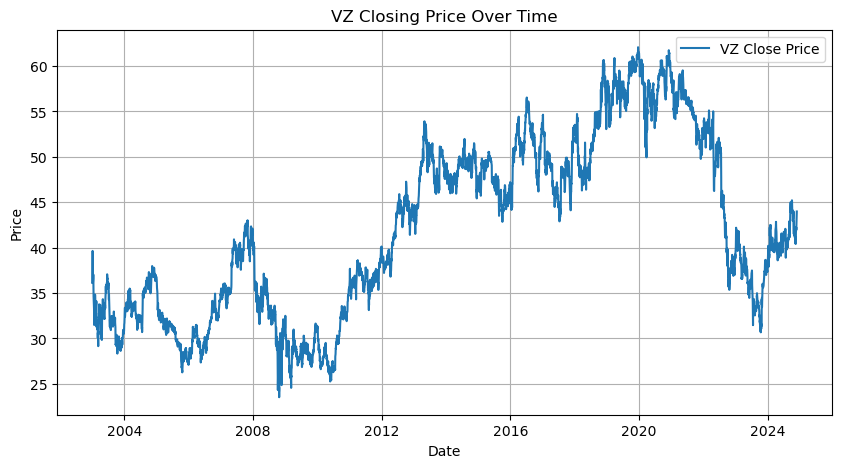

In [ ]:
import matplotlib.pyplot as plt

# Plot closing prices over time for each stock to understand if there are any common trends: around 2023, there is a downfall for most of the stocks.
for ticker, data in stock_data.items():
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Close'], label=f'{ticker} Close Price')
    plt.title(f'{ticker} Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Correlation analysi to understand how different stocks move in relation to each other.


closing_prices = pd.DataFrame({ticker: data['Close'] for ticker, data in stock_data.items()})

# Calculate correlation matrix
correlation_matrix = closing_prices.corr()

# Unstack the correlation matrix to get a Series of correlations
correlation_pairs = correlation_matrix.unstack()

# Remove self-correlations (where a stock is correlated with itself)
correlation_pairs = correlation_pairs[correlation_pairs != 1.0]

# Sort correlations by absolute value to find the strongest relationships
sorted_correlation_pairs = correlation_pairs.sort_values(kind="quicksort", key=abs, ascending=False)

# Display the top 20 strongest correlations (both positive and negative)
print("Top 20 strongest correlations:")
print(sorted_correlation_pairs.head(20))

# Display the top 20 weakest correlations
print("\nTop 20 weakest correlations (closest to zero):")
print(sorted_correlation_pairs.tail(20))


ValueError: If using all scalar values, you must pass an index

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Assume correlation_matrix is your stock correlation matrix
# Perform hierarchical clustering using the correlation matrix
linkage_matrix = linkage(correlation_matrix, method='ward')

# Define the number of clusters you want
num_clusters = 5  # You can adjust this number based on your data

# Assign each stock to a cluster
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame to map stocks to their cluster labels
stock_clusters = pd.DataFrame({'Stock': correlation_matrix.columns, 'Cluster': cluster_labels})

# Sort the DataFrame by cluster for easier interpretation
stock_clusters.sort_values('Cluster', inplace=True)

print(stock_clusters)


    Stock  Cluster
0    AAPL        1
21   NFLX        1
48   ISRG        1
25    CRM        1
27    MRK        1
30    PEP        1
31    ACN        1
32    LIN        1
20    JNJ        1
33    TMO        1
35   CSCO        1
36   ADBE        1
40    ABT        1
41    DHR        1
42    AXP        1
44    CAT        1
46   QCOM        1
34    MCD        1
19   COST        1
24     KO        1
17     HD        1
16     MA        1
15   ORCL        1
14    UNH        1
2    MSFT        1
3    GOOG        1
4   GOOGL        1
5    AMZN        1
11    JPM        1
10    WMT        1
18     PG        1
1    NVDA        2
45    NOW        2
43     MS        2
6    META        2
8     LLY        2
9    TSLA        2
12      V        2
29    AMD        2
28   TMUS        2
26    CVX        2
22   ABBV        2
7    AVGO        2
37    WFC        3
38    IBM        3
13    XOM        3
47     PM        3
49     VZ        3
23    BAC        4
39     GE        5


              Open         High          Low        Close    Adj Close  \
count  5487.000000  5487.000000  5487.000000  5487.000000  5487.000000   
mean     46.706330    47.203506    46.228308    46.737411    45.154825   
std      59.816284    60.450383    59.221965    59.867559    59.751579   
min       0.231964     0.235536     0.227143     0.234286     0.197849   
25%       4.833036     4.891250     4.716607     4.822143     4.072180   
50%      21.104286    21.276787    20.875713    21.054644    17.946768   
75%      51.893749    52.298750    51.446249    51.908751    49.824257   
max     236.479996   237.490005   234.009995   235.000000   235.000000   

             Volume  
count  5.487000e+03  
mean   3.887062e+08  
std    3.885508e+08  
min    2.404830e+07  
25%    1.081084e+08  
50%    2.513112e+08  
75%    5.436508e+08  
max    3.372970e+09  


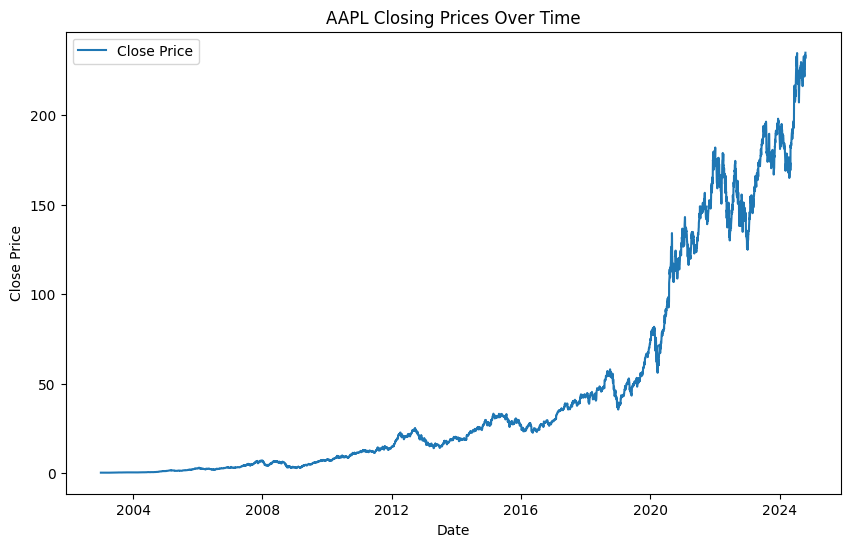

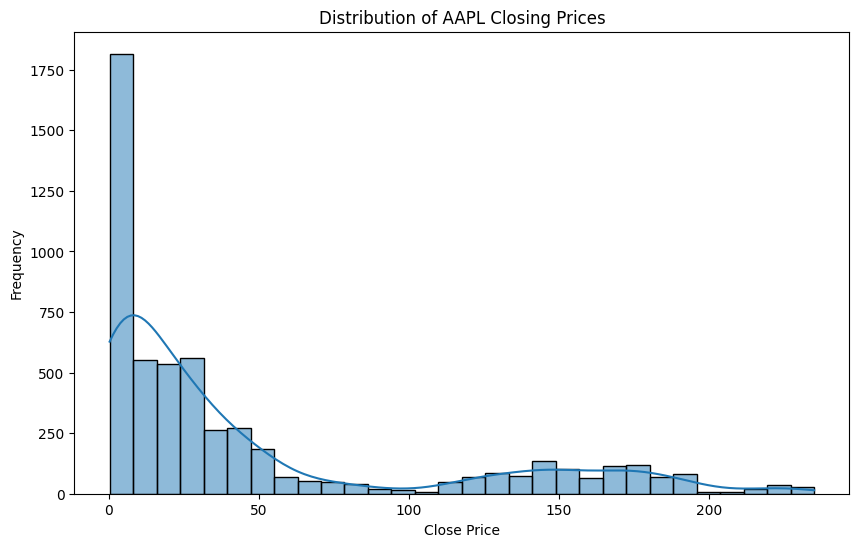

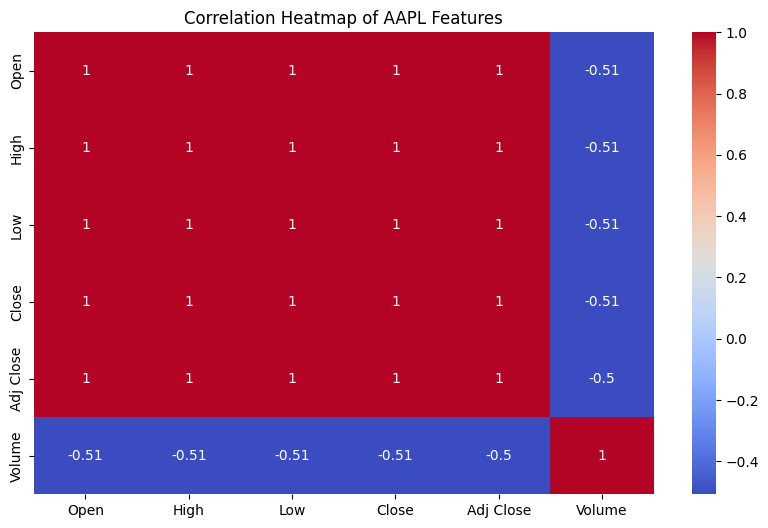

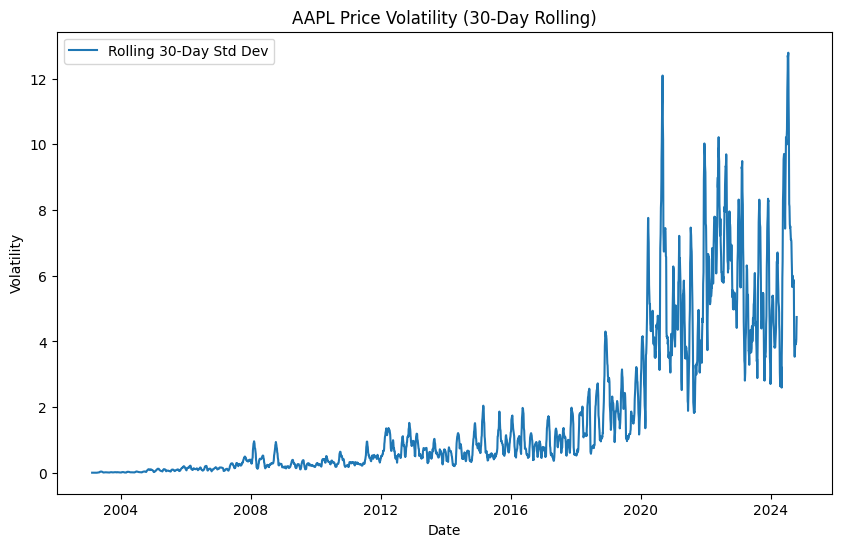

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dictionary to a DataFrame for a single stock (e.g., AAPL)
df = stock_data['AAPL']

# Descriptive Statistics
print(df.describe())

# Plotting Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Histogram of Closing Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of AAPL Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of AAPL Features')
plt.show()

# Volatility Analysis - Rolling Standard Deviation
df['Rolling_STD'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Rolling_STD'], label='Rolling 30-Day Std Dev')
plt.title('AAPL Price Volatility (30-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


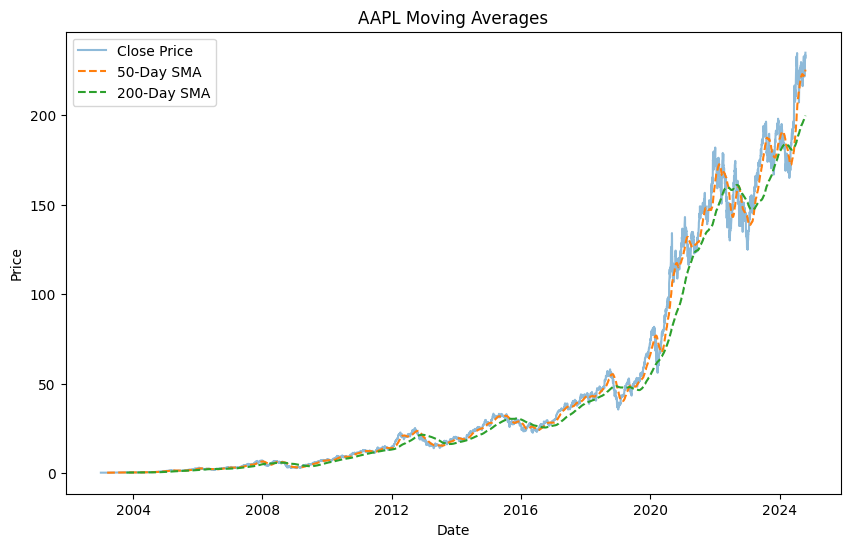

In [ ]:
# Calculate moving averages
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
plt.plot(df.index, df['SMA50'], label='50-Day SMA', linestyle='--')
plt.plot(df.index, df['SMA200'], label='200-Day SMA', linestyle='--')
plt.title('AAPL Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


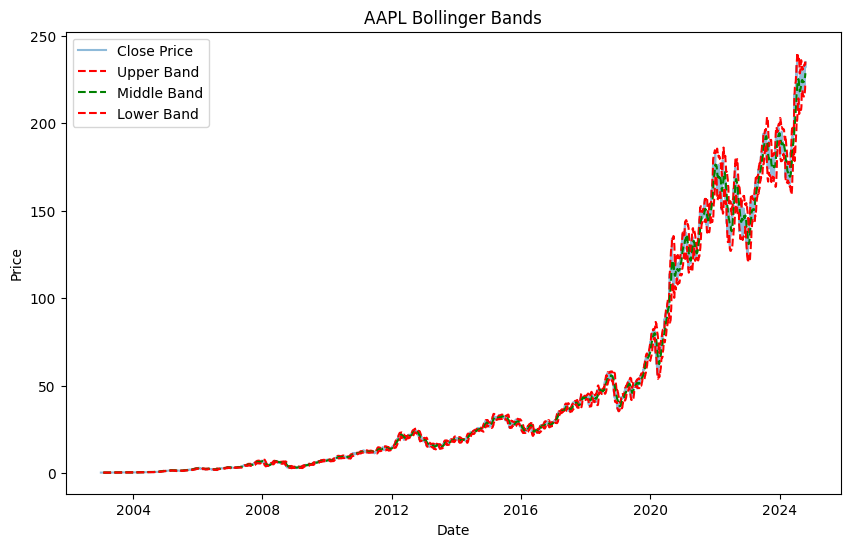

In [ ]:
# Calculate Bollinger Bands
df['Middle Band'] = df['Close'].rolling(window=20).mean()
df['Upper Band'] = df['Middle Band'] + 2 * df['Close'].rolling(window=20).std()
df['Lower Band'] = df['Middle Band'] - 2 * df['Close'].rolling(window=20).std()

# Plot Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
plt.plot(df.index, df['Upper Band'], label='Upper Band', linestyle='--', color='red')
plt.plot(df.index, df['Middle Band'], label='Middle Band', linestyle='--', color='green')
plt.plot(df.index, df['Lower Band'], label='Lower Band', linestyle='--', color='red')
plt.title('AAPL Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


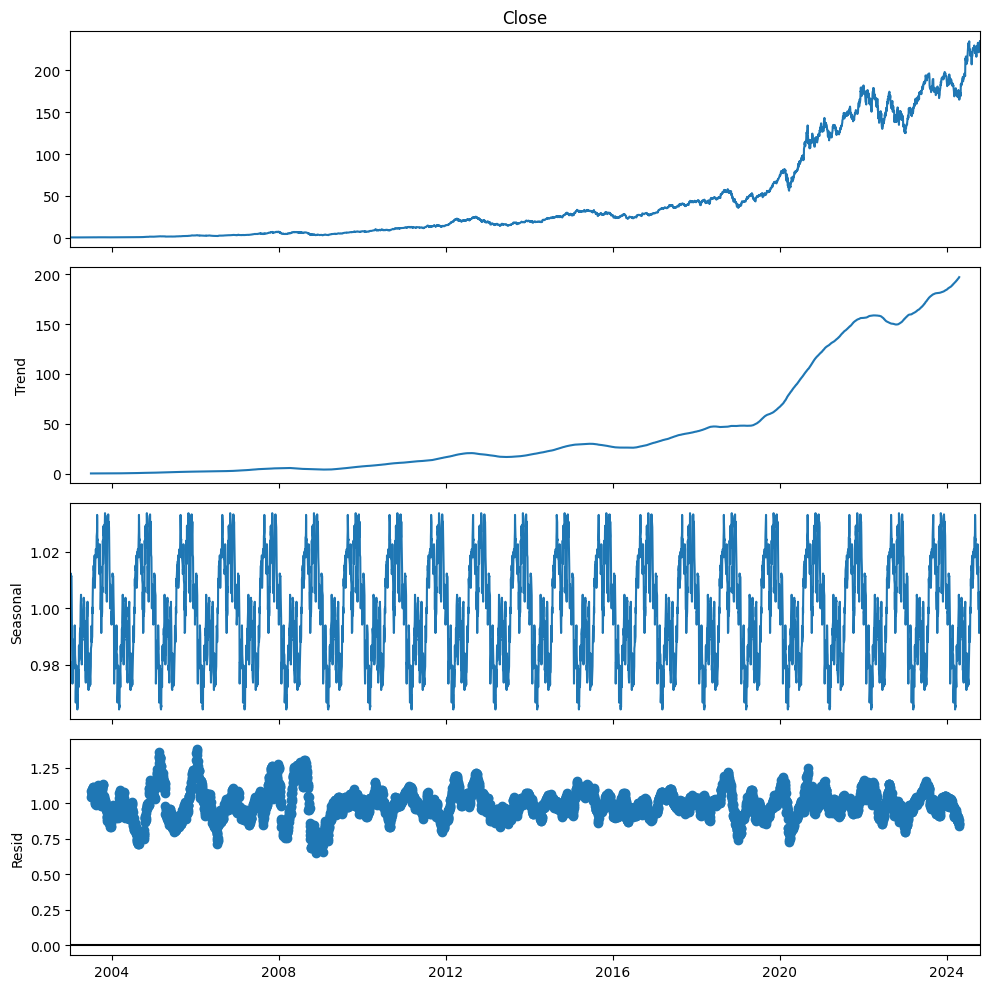

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming `df` is your DataFrame with a 'Close' column for a specific stock
# Make sure your data is in a time series format with a DateTime index

# Perform seasonal decomposition
result = seasonal_decompose(df['Close'], model='multiplicative', period=252)  # Assuming daily data with approx. 252 trading days in a year

# Plot the decomposition results
plt.rcParams.update({'figure.figsize': (10, 10)})
result.plot()
plt.show()
